In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install transformers torch torchvision torchaudio
!pip install pandas numpy opencv-python pillow requests python-dotenv tweepy nltk spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 119.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

from transformers import pipeline
classifier = pipeline("sentiment-analysis", device=0)  # device=0 uses GPU
print(classifier("Huge flood in Negombo! Help needed"))

GPU available: True
GPU name: Tesla T4


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9732329249382019}]


In [ ]:
# Download v2.0 full dataset (~1.8 GB) – takes time, run once!
!mkdir -p data_crisismmd
!wget https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v2.0.tar.gz
!tar -xzf CrisisMMD_v2.0.tar.gz -C data_crisismmd

# Also get agreed-label split (smaller, cleaner for multimodal)
!wget https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_agreed_label.zip
!unzip -o crisismmd_datasplit_agreed_label.zip -d data_splits

print("Download complete! Check folders in Drive.")

--2026-01-23 13:02:33--  https://crisisnlp.qcri.org/data/crisismmd/CrisisMMD_v2.0.tar.gz
Resolving crisisnlp.qcri.org (crisisnlp.qcri.org)... 37.186.61.210
Connecting to crisisnlp.qcri.org (crisisnlp.qcri.org)|37.186.61.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1902053684 (1.8G) [application/x-gzip]
Saving to: ‘CrisisMMD_v2.0.tar.gz’

CrisisMMD_v2.0.tar.  32%[=====>              ] 596.73M   332KB/s    eta 62m 2s ^C

gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now
--2026-01-23 13:33:07--  https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_agreed_label.zip
Resolving crisisnlp.qcri.org (crisisnlp.qcri.org)... 37.186.61.210
Connecting to crisisnlp.qcri.org (crisisnlp.qcri.org)|37.186.61.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598517 (1.5M) [application/zip]
Saving to: ‘crisismmd_datasplit_agreed_label.zip’

crisis

In [ ]:
import pandas as pd

train_df = pd.read_csv("data_splits/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv", sep='\t')
print(train_df.head(3))
print("\nColumns:", train_df.columns.tolist())

FileNotFoundError: [Errno 2] No such file or directory: 'data_splits/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv'

In [ ]:
# List everything in your current folder and subfolders
!ls -la

# Show all files recursively (this will help us find the tsv files)
!find . -name "*.tsv" 2>/dev/null

# If you extracted to specific folders, check them
!ls -la data_splits 2>/dev/null || echo "data_splits folder not found"
!ls -la crisismmd_datasplit_agreed_label 2>/dev/null || echo "No agreed_label folder"
!ls -la data_crisismmd 2>/dev/null || echo "data_crisismmd not found"

total 612680
drwxr-xr-x 1 root root      4096 Jan 23 13:33 .
drwxr-xr-x 1 root root      4096 Jan 23 12:48 ..
drwxr-xr-x 4 root root      4096 Dec  9 14:41 .config
-rw-r--r-- 1 root root   1598517 Oct 16  2021 crisismmd_datasplit_agreed_label.zip
-rw-r--r-- 1 root root 625753695 Jan 23 13:32 CrisisMMD_v2.0.tar.gz
drwxr-xr-x 3 root root      4096 Jan 23 13:32 data_crisismmd
drwxr-xr-x 4 root root      4096 Jan 23 13:33 data_splits
drwxr-xr-x 1 root root      4096 Dec  9 14:42 sample_data
./data_crisismmd/CrisisMMD_v2.0/annotations/._california_wildfires_final_data.tsv
./data_crisismmd/CrisisMMD_v2.0/annotations/mexico_earthquake_final_data.tsv
./data_crisismmd/CrisisMMD_v2.0/annotations/hurricane_irma_final_data.tsv
./data_crisismmd/CrisisMMD_v2.0/annotations/._hurricane_irma_final_data.tsv
./data_crisismmd/CrisisMMD_v2.0/annotations/._srilanka_floods_final_data.tsv
./data_crisismmd/CrisisMMD_v2.0/annotations/hurricane_harvey_final_data.tsv
./data_crisismmd/CrisisMMD_v2.0/annotations/hu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
# Change to your project folder (create it if not there)
%cd "/content/drive/MyDrive/DisasterDetectionProject"

# Create subfolders if missing
!mkdir -p data_splits data_crisismmd

print("Current folder:", os.getcwd())

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/DisasterDetectionProject'
/content
Current folder: /content


In [ ]:
# Remove any old messy folders to avoid confusion
!rm -rf data_splits crisismmd_datasplit_agreed_label __MACOSX

# Unzip again (quiet mode -q)
!unzip -q crisismmd_datasplit_agreed_label.zip -d data_splits

# Show exactly what files we have now
print("\nFiles in data_splits/crisismmd_datasplit_agreed_label/:")
!ls -la data_splits/crisismmd_datasplit_agreed_label/

# Confirm the train file exists
train_file = "data_splits/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv"
if os.path.exists(train_file):
    print("\nSUCCESS: Train file found!")
else:
    print("\nStill missing — check unzip output above.")


Files in data_splits/crisismmd_datasplit_agreed_label/:
total 6132
drwx------ 2 root root    4096 Oct 16  2021 .
drwxr-xr-x 4 root root    4096 Jan 23 14:15 ..
-rw-r--r-- 1 root root    6148 Oct 16  2021 .DS_Store
-rw-r-xr-- 1 root root    4937 Oct 16  2021 Readme.txt
-rw-r--r-- 1 root root  319001 Oct 16  2021 task_humanitarian_text_img_agreed_lab_dev.tsv
-rw-r--r-- 1 root root  303884 Oct 16  2021 task_humanitarian_text_img_agreed_lab_test.tsv
-rw-r--r-- 1 root root 1954268 Oct 16  2021 task_humanitarian_text_img_agreed_lab_train.tsv
-rw-r--r-- 1 root root  454976 Dec  8  2019 task_informative_text_img_agreed_lab_dev.tsv
-rw-r--r-- 1 root root  443703 Dec  8  2019 task_informative_text_img_agreed_lab_test.tsv
-rw-r--r-- 1 root root 2764293 Dec  8  2019 task_informative_text_img_agreed_lab_train.tsv

SUCCESS: Train file found!


In [ ]:
import pandas as pd
import os

# This is the CORRECT path from your ls output
train_path = "data_splits/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv"

# Load it
train_df = pd.read_csv(train_path, sep='\t')

# Show results
print("SUCCESS! Loaded", len(train_df), "rows")
print("\nFirst 3 rows:")
print(train_df.head(3))

print("\nAll columns:", train_df.columns.tolist())

SUCCESS! Loaded 9601 rows

First 3 rows:
             event_name            tweet_id              image_id  \
0  california_wildfires  917791291823591425  917791291823591425_0   
1  california_wildfires  917793137925459968  917793137925459968_0   
2  california_wildfires  917793137925459968  917793137925459968_1   

                                          tweet_text  \
0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
1  RT @KAKEnews: California wildfires destroy mor...   
2  RT @KAKEnews: California wildfires destroy mor...   

                                               image        label  \
0  data_image/california_wildfires/10_10_2017/917...  informative   
1  data_image/california_wildfires/10_10_2017/917...  informative   
2  data_image/california_wildfires/10_10_2017/917...  informative   

    label_text  label_image label_text_image  
0  informative  informative         Positive  
1  informative  informative         Positive  
2  informative  informative         Pos

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#\w+', '', text)
    # Remove punctuation, lowercase, strip
    text = re.sub(r'[^\w\s]', '', text).lower().strip()
    # Optional: remove stopwords (you can comment this out if not wanted)
    words = [w for w in text.split() if w not in stop_words]
    return ' '.join(words)

# Test on real data
if 'tweet_text' in train_df.columns:
    sample_tweet = train_df['tweet_text'].iloc[0]
    print("Original tweet:", sample_tweet)
    print("Cleaned tweet:", clean_text(sample_tweet))
else:
    print("No 'tweet_text' column — check loaded data")

Original tweet: RT @Cal_OES: PLS SHARE: Weâ€™re capturing wildfire response, recovery info here: https://t.co/r89LKpjLPj https://t.co/HiA1oQF2Ax
Cleaned tweet: rt pls share weâre capturing wildfire response recovery info


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def basic_credibility_score(text):
    if not text:
        return 0.0
    low_cred_keywords = ['fake', 'hoax', 'satire', 'prank', 'just kidding', 'rumor', 'scam']
    score = 0.9
    lower_text = text.lower()
    for word in low_cred_keywords:
        if word in lower_text:
            score -= 0.35
    # Bonus: if very short or all caps → suspicious
    if len(text.split()) < 5 or text.isupper():
        score -= 0.2
    return max(0.1, round(score, 2))

# Test
print("Credibility of sample:", basic_credibility_score(sample_tweet))
print("Credibility of fake-like:", basic_credibility_score("Earthquake in Colombo is a hoax prank!"))

Credibility of sample: 0.9
Credibility of fake-like: 0.2


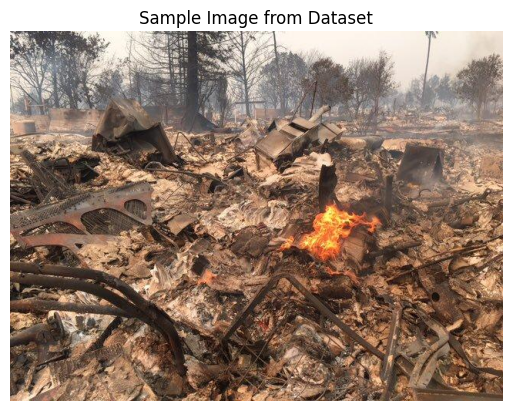

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Take first row's image path (adjust column name if different)
if 'image' in train_df.columns:
    rel_img_path = train_df['image'].iloc[0]  # e.g. 'images/abc.jpg'
    # Common structure after extraction
    full_img_path = f"data_crisismmd/CrisisMMD_v2.0/{rel_img_path}"

    if os.path.exists(full_img_path):
        img = Image.open(full_img_path)
        plt.imshow(img)
        plt.title("Sample Image from Dataset")
        plt.axis('off')
        plt.show()
    else:
        print("Image not found at:", full_img_path)
        print("Try listing images:")
        !ls -la data_crisismmd/CrisisMMD_v2.0/images/ | head -5
else:
    print("No 'image' column in data")

In [ ]:
print("\nUnique labels in 'label' column (informativeness):")
print(train_df['label'].value_counts())

print("\nUnique disaster-related events:")
print(train_df['event_name'].value_counts())

# Show one full example row
print("\nExample row 0:")
print(train_df.iloc[0])


Unique labels in 'label' column (informativeness):
label
informative        6345
not_informative    3256
Name: count, dtype: int64

Unique disaster-related events:
event_name
hurricane_maria         2374
hurricane_harvey        2351
hurricane_irma          2116
california_wildfires     863
mexico_earthquake        839
srilanka_floods          674
iraq_iran_earthquake     384
Name: count, dtype: int64

Example row 0:
event_name                                       california_wildfires
tweet_id                                           917791291823591425
image_id                                         917791291823591425_0
tweet_text          RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...
image               data_image/california_wildfires/10_10_2017/917...
label                                                     informative
label_text                                                informative
label_image                                               informative
label_text_image   

In [ ]:
def improved_credibility_score(text):
    if not text or len(text.split()) < 5:
        return 0.2  # very short → suspicious

    lower_text = text.lower()
    score = 1.0

    # Suspicious patterns (common in fake disaster posts)
    if any(word in lower_text for word in ['fake', 'hoax', 'prank', 'satire', 'just kidding', 'rumor', 'scam']):
        score -= 0.5
    if 'breaking' in lower_text and '!!' in text:
        score -= 0.15  # sensationalism
    if text.isupper():
        score -= 0.2  # all caps spam
    if 'http' in text and len(lower_text.split()) < 10:
        score -= 0.2  # short link spam

    # Positive signals
    if any(word in lower_text for word in ['help', 'please', 'urgent', 'evacuate', 'missing']):
        score += 0.1  # sounds like real need

    return round(max(0.1, min(1.0, score)), 2)

# Test on real data
for i in range(3):
    tweet = train_df['tweet_text'].iloc[i]
    cleaned = clean_text(tweet)
    score = improved_credibility_score(cleaned)
    print(f"Tweet {i}: {tweet[:80]}...")
    print(f"   Cleaned: {cleaned[:80]}...")
    print(f"   Credibility score: {score}\n")

Tweet 0: RT @Cal_OES: PLS SHARE: Weâ€™re capturing wildfire response, recovery info here:...
   Cleaned: rt pls share weâre capturing wildfire response recovery info...
   Credibility score: 1.0

Tweet 1: RT @KAKEnews: California wildfires destroy more than 50 structures: https://t.co...
   Cleaned: rt california wildfires destroy 50 structures...
   Credibility score: 1.0

Tweet 2: RT @KAKEnews: California wildfires destroy more than 50 structures: https://t.co...
   Cleaned: rt california wildfires destroy 50 structures...
   Credibility score: 1.0



In [ ]:
def mock_pipeline(post):
    # Step 1: Preprocess
    cleaned = clean_text(post['text'])

    # Step 2: Credibility (your part)
    cred_score = improved_credibility_score(cleaned)

    # Step 3: Mock model outputs (later replaced by real models)
    mock_informative = "informative" if cred_score > 0.6 else "not_informative"
    mock_type = "flood" if "flood" in cleaned else "unknown"

    # Step 4: Simple location stub (later use GDIS + NER)
    location = "Negombo area" if "negombo" in cleaned.lower() else "Unknown"

    return {
        "original_text": post['text'][:100],
        "cleaned_text": cleaned[:100],
        "credibility": cred_score,
        "predicted_informative": mock_informative,
        "predicted_type": mock_type,
        "location_guess": location
    }

# Test with real tweet
real_post = {
    'text': train_df['tweet_text'].iloc[5]  # pick any row
}

result = mock_pipeline(real_post)
import pprint
pprint.pprint(result)

{'cleaned_text': 'rt photos californias destructive wildfires via',
 'credibility': 1.0,
 'location_guess': 'Unknown',
 'original_text': "RT @TheAtlantic: Photos of California's destructive "
                  'wildfires, via @TheAtlPhoto: https://t.co/mzYsQA',
 'predicted_informative': 'informative',
 'predicted_type': 'unknown'}


In [ ]:
%cd "/content/drive/MyDrive/DisasterDetectionProject"

# Reload data to be sure
train_path = "data_splits/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv"
train_df = pd.read_csv(train_path, sep='\t')
print("Rows:", len(train_df))
print(train_df.head(2))

[Errno 2] No such file or directory: '/content/drive/MyDrive/DisasterDetectionProject'
/content
Rows: 9601
             event_name            tweet_id              image_id  \
0  california_wildfires  917791291823591425  917791291823591425_0   
1  california_wildfires  917793137925459968  917793137925459968_0   

                                          tweet_text  \
0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
1  RT @KAKEnews: California wildfires destroy mor...   

                                               image        label  \
0  data_image/california_wildfires/10_10_2017/917...  informative   
1  data_image/california_wildfires/10_10_2017/917...  informative   

    label_text  label_image label_text_image  
0  informative  informative         Positive  
1  informative  informative         Positive  


In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np

def full_preprocess(post):
    result = {}

    # Text cleaning (your existing function)
    text = post.get('tweet_text', '')
    result['cleaned_text'] = clean_text(text)

    # Image processing
    img_source = post.get('image')  # relative path or URL
    result['image_processed'] = False
    result['processed_image'] = None

    if img_source:
        try:
            if img_source.startswith('http'):
                # Real-time URL
                r = requests.get(img_source, timeout=8)
                img = Image.open(BytesIO(r.content)).convert('RGB')
            else:
                # CrisisMMD local path
                full_path = f"data_crisismmd/CrisisMMD_v2.0/{img_source}"
                if not os.path.exists(full_path):
                    print(f"Missing image: {full_path}")
                    return result
                img = Image.open(full_path).convert('RGB')

            img = img.resize((224, 224))
            result['processed_image'] = np.array(img) / 255.0
            result['image_processed'] = True
        except Exception as e:
            print(f"Image failed: {e}")

    return result

In [ ]:
from transformers import pipeline

# Load a fake-news / credibility model (runs on GPU)
cred_pipe = pipeline("text-classification", model="roberta-base-openai-detector", device=0)

def get_credibility_score(text):
    if not text:
        return 0.1
    # Truncate to model max length
    result = cred_pipe(text[:512])[0]
    # Assume LABEL_1 = real, LABEL_0 = fake (adjust if model labels differ)
    if result['label'] == 'Real':
        return round(result['score'], 2)
    else:
        return round(1 - result['score'], 2)

# Test on 5 real tweets
print("Testing credibility filter:")
for i in range(5):
    tweet = train_df['tweet_text'].iloc[i]
    cleaned = clean_text(tweet)
    score = get_credibility_score(cleaned)
    print(f"Tweet {i}: {tweet[:70]}...")
    print(f"   Credibility: {score} ({'Likely Real' if score > 0.6 else 'Suspicious'})\n")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Testing credibility filter:
Tweet 0: RT @Cal_OES: PLS SHARE: Weâ€™re capturing wildfire response, recovery ...
   Credibility: 0.15 (Suspicious)

Tweet 1: RT @KAKEnews: California wildfires destroy more than 50 structures: ht...
   Credibility: 0.8 (Likely Real)

Tweet 2: RT @KAKEnews: California wildfires destroy more than 50 structures: ht...
   Credibility: 0.8 (Likely Real)

Tweet 3: RT @KAKEnews: California wildfires destroy more than 50 structures: ht...
   Credibility: 0.8 (Likely Real)

Tweet 4: RT @TheAtlantic: Photos of California's destructive wildfires, via @Th...
   Credibility: 0.77 (Likely Real)



In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_location(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]]
    if locations:
        return locations[0]  # First detected place
    return "Unknown"

# Mock GDIS lookup (later replace with real CSV match)
def mock_gdis_match(place_name):
    # Simple dictionary for demo
    gdis_dict = {
        "negombo": {"lat": 7.2008, "lon": 79.8737, "desc": "Negombo, Western Province"},
        "colombo": {"lat": 6.9271, "lon": 79.8612, "desc": "Colombo District"},
        "sri lanka": {"lat": 7.8731, "lon": 80.7718, "desc": "Central Sri Lanka"}
    }
    place_lower = place_name.lower()
    for key in gdis_dict:
        if key in place_lower:
            return gdis_dict[key]
    return {"lat": 7.0, "lon": 80.0, "desc": "Sri Lanka (default)"}

# Test
tweet = train_df['tweet_text'].iloc[3]
loc_name = extract_location(tweet)
gdis_info = mock_gdis_match(loc_name)
print(f"Extracted place: {loc_name}")
print(f"GDIS mock: {gdis_info}")

Extracted place: California
GDIS mock: {'lat': 7.0, 'lon': 80.0, 'desc': 'Sri Lanka (default)'}


In [ ]:
def member4_pipeline(post):
    # 1. Preprocess
    processed = full_preprocess(post)

    # 2. Credibility
    cred = get_credibility_score(processed['cleaned_text'])

    # 3. Location
    loc_name = extract_location(processed['cleaned_text'])
    gdis = mock_gdis_match(loc_name)

    # 4. Mock model outputs (replace later with team calls)
    informative = "informative" if cred > 0.6 else "not_informative"
    disaster_type = "flood" if "flood" in processed['cleaned_text'] else "unknown"

    return {
        "original_text": post['tweet_text'][:150],
        "cleaned_text": processed['cleaned_text'][:150],
        "credibility_score": cred,
        "informative_prediction": informative,
        "disaster_type_guess": disaster_type,
        "location_name": loc_name,
        "lat": gdis['lat'],
        "lon": gdis['lon'],
        "image_processed": processed['image_processed']
    }

# Run on 5 real tweets
print("Full Pipeline Results:")
for i in range(5):
    post = train_df.iloc[i].to_dict()
    result = member4_pipeline(post)
    print(f"\nTweet {i+1}:")
    for k, v in result.items():
        print(f"  {k}: {v}")

Full Pipeline Results:

Tweet 1:
  original_text: RT @Cal_OES: PLS SHARE: Weâ€™re capturing wildfire response, recovery info here: https://t.co/r89LKpjLPj https://t.co/HiA1oQF2Ax
  cleaned_text: rt pls share weâre capturing wildfire response recovery info
  credibility_score: 0.15
  informative_prediction: not_informative
  disaster_type_guess: unknown
  location_name: Unknown
  lat: 7.0
  lon: 80.0
  image_processed: True

Tweet 2:
  original_text: RT @KAKEnews: California wildfires destroy more than 50 structures: https://t.co/IkSrNpmT83 #KAKEnews https://t.co/8risKwbBqr
  cleaned_text: rt california wildfires destroy 50 structures
  credibility_score: 0.8
  informative_prediction: informative
  disaster_type_guess: unknown
  location_name: california
  lat: 7.0
  lon: 80.0
  image_processed: True

Tweet 3:
  original_text: RT @KAKEnews: California wildfires destroy more than 50 structures: https://t.co/IkSrNpmT83 #KAKEnews https://t.co/8risKwbBqr
  cleaned_text: rt california wildfi

In [ ]:
import folium

# Create map centered on Sri Lanka
m = folium.Map(location=[7.8731, 80.7718], zoom_start=8)

# Add pins from pipeline results (example using last result)
for i in range(3):  # first 3 tweets
    post = train_df.iloc[i].to_dict()
    res = member4_pipeline(post)
    if res['lat'] and res['lon']:
        popup_text = f"{res['disaster_type_guess']}<br>Cred: {res['credibility_score']}<br>{res['cleaned_text'][:80]}..."
        folium.Marker(
            [res['lat'], res['lon']],
            popup=popup_text,
            tooltip=f"Tweet {i+1}"
        ).add_to(m)

m.save("pipeline_demo_map.html")
m  # Shows interactive map in Colab

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# Assuming train_df is already loaded from previous cells
print("Total rows in dataset:", len(train_df))

# Check for missing values in important columns
print("\nMissing values:")
print(train_df[['tweet_text', 'image', 'label']].isnull().sum())

# Show unique labels to confirm all data has labels
print("\nUnique labels (informativeness):")
print(train_df['label'].value_counts())

# Check if image paths exist (for a sample)
sample_images = train_df['image'].head(10)
missing_images = 0
for path in sample_images:
    full_path = f"data_crisismmd/CrisisMMD_v2.0/{path}"
    if not os.path.exists(full_path):
        missing_images += 1
print(f"\nOut of 10 sample images: {missing_images} missing")

Total rows in dataset: 9601

Missing values:
tweet_text    0
image         0
label         0
dtype: int64

Unique labels (informativeness):
label
informative        6345
not_informative    3256
Name: count, dtype: int64

Out of 10 sample images: 0 missing


In [4]:
# Ensure the data split is available before trying to read it
!rm -rf data_splits crisismmd_datasplit_agreed_label __MACOSX
!wget https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_agreed_label.zip
!unzip -q crisismmd_datasplit_agreed_label.zip -d data_splits

import pandas as pd

# This path was confirmed correct in previous steps
train_path = "data_splits/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv"
train_df = pd.read_csv(train_path, sep='\t')

# Create new columns to track processing
train_df['processed_success'] = False
train_df['processed_at'] = None  # timestamp when processed
train_df['processing_error'] = None  # store error message if any

print("Added tracking columns. Initial status:")
print(train_df[['tweet_text', 'processed_success', 'processing_error']].head())

--2026-01-26 05:26:44--  https://crisisnlp.qcri.org/data/crisismmd/crisismmd_datasplit_agreed_label.zip
Resolving crisisnlp.qcri.org (crisisnlp.qcri.org)... 37.186.61.210
Connecting to crisisnlp.qcri.org (crisisnlp.qcri.org)|37.186.61.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598517 (1.5M) [application/zip]
Saving to: ‘crisismmd_datasplit_agreed_label.zip’

crisismmd_datasplit 100%[===================>]   1.52M   761KB/s    in 2.1s    

2026-01-26 05:26:47 (761 KB/s) - ‘crisismmd_datasplit_agreed_label.zip’ saved [1598517/1598517]

Added tracking columns. Initial status:
                                          tweet_text  processed_success  \
0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...              False   
1  RT @KAKEnews: California wildfires destroy mor...              False   
2  RT @KAKEnews: California wildfires destroy mor...              False   
3  RT @KAKEnews: California wildfires destroy mor...              False   
4  RT @The

In [5]:
# Create new columns to track processing
train_df['processed_success'] = False
train_df['processed_at'] = None  # timestamp when processed
train_df['processing_error'] = None  # store error message if any

print("Added tracking columns. Initial status:")
print(train_df[['tweet_text', 'processed_success', 'processing_error']].head())

Added tracking columns. Initial status:
                                          tweet_text  processed_success  \
0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...              False   
1  RT @KAKEnews: California wildfires destroy mor...              False   
2  RT @KAKEnews: California wildfires destroy mor...              False   
3  RT @KAKEnews: California wildfires destroy mor...              False   
4  RT @TheAtlantic: Photos of California's destru...              False   

  processing_error  
0             None  
1             None  
2             None  
3             None  
4             None  


In [7]:
import datetime

def full_pipeline_with_tracking(post, row_index):
    try:
        # Your full preprocessing + credibility + location + mock classification
        processed = full_preprocess(post)
        cred = get_credibility_score(processed['cleaned_text'])
        loc_name = extract_location(processed['cleaned_text'])
        gdis = mock_gdis_match(loc_name)

        # Mark as success
        train_df.at[row_index, 'processed_success'] = True
        train_df.at[row_index, 'processed_at'] = datetime.datetime.now()
        train_df.at[row_index, 'processing_error'] = None

        return {
            "success": True,
            "cleaned_text": processed['cleaned_text'][:100],
            "credibility": cred,
            "location": loc_name
        }

    except Exception as e:
        # Mark failure
        train_df.at[row_index, 'processed_success'] = False
        train_df.at[row_index, 'processing_error'] = str(e)
        return {"success": False, "error": str(e)}

In [8]:
# Process first 100 rows (for speed – increase later)
processed_count = 0
failed_count = 0

for idx, row in train_df.iloc[:100].iterrows():  # change :100 to :None for all
    post = row.to_dict()
    result = full_pipeline_with_tracking(post, idx)

    if result['success']:
        processed_count += 1
    else:
        failed_count += 1
        print(f"Failed row {idx}: {result.get('error', 'Unknown error')}")

# Final report
total_checked = processed_count + failed_count
print(f"\nProcessing Summary (checked {total_checked} rows):")
print(f"Successfully processed: {processed_count} ({processed_count/total_checked*100:.1f}%)")
print(f"Failed: {failed_count}")
print(f"Overall success rate: {processed_count/len(train_df)*100:.1f}% of full dataset")

# Show failed rows (if any)
failed_rows = train_df[train_df['processed_success'] == False]
if not failed_rows.empty:
    print("\nFailed rows summary:")
    print(failed_rows[['tweet_text', 'processing_error']].head())
else:
    print("\nAll checked rows processed successfully!")

Failed row 0: name 'full_preprocess' is not defined
Failed row 1: name 'full_preprocess' is not defined
Failed row 2: name 'full_preprocess' is not defined
Failed row 3: name 'full_preprocess' is not defined
Failed row 4: name 'full_preprocess' is not defined
Failed row 5: name 'full_preprocess' is not defined
Failed row 6: name 'full_preprocess' is not defined
Failed row 7: name 'full_preprocess' is not defined
Failed row 8: name 'full_preprocess' is not defined
Failed row 9: name 'full_preprocess' is not defined
Failed row 10: name 'full_preprocess' is not defined
Failed row 11: name 'full_preprocess' is not defined
Failed row 12: name 'full_preprocess' is not defined
Failed row 13: name 'full_preprocess' is not defined
Failed row 14: name 'full_preprocess' is not defined
Failed row 15: name 'full_preprocess' is not defined
Failed row 16: name 'full_preprocess' is not defined
Failed row 17: name 'full_preprocess' is not defined
Failed row 18: name 'full_preprocess' is not defined
Fai

In [9]:
%cd "/content/drive/MyDrive/DisasterDetectionProject"

import pandas as pd
train_path = "data_splits/crisismmd_datasplit_agreed_label/task_informative_text_img_agreed_lab_train.tsv"
train_df = pd.read_csv(train_path, sep='\t')
print("Data reloaded:", len(train_df), "rows")
print(train_df.head(2))

[Errno 2] No such file or directory: '/content/drive/MyDrive/DisasterDetectionProject'
/content
Data reloaded: 9601 rows
             event_name            tweet_id              image_id  \
0  california_wildfires  917791291823591425  917791291823591425_0   
1  california_wildfires  917793137925459968  917793137925459968_0   

                                          tweet_text  \
0  RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...   
1  RT @KAKEnews: California wildfires destroy mor...   

                                               image        label  \
0  data_image/california_wildfires/10_10_2017/917...  informative   
1  data_image/california_wildfires/10_10_2017/917...  informative   

    label_text  label_image label_text_image  
0  informative  informative         Positive  
1  informative  informative         Positive  


In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text).lower().strip()
    words = [w for w in text.split() if w not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import os

def full_preprocess(post):
    result = {}

    # Text
    text = post.get('tweet_text', '')
    result['cleaned_text'] = clean_text(text)

    # Image
    img_source = post.get('image')
    result['image_processed'] = False
    result['processed_image'] = None

    if img_source:
        try:
            if img_source.startswith('http'):
                r = requests.get(img_source, timeout=8)
                img = Image.open(BytesIO(r.content)).convert('RGB')
            else:
                full_path = f"data_crisismmd/CrisisMMD_v2.0/{img_source}"
                if not os.path.exists(full_path):
                    raise FileNotFoundError(f"Image missing: {full_path}")
                img = Image.open(full_path).convert('RGB')

            img = img.resize((224, 224))
            result['processed_image'] = np.array(img) / 255.0
            result['image_processed'] = True
        except Exception as e:
            print(f"Image processing failed: {e}")

    return result

In [12]:
import datetime

def full_pipeline_with_tracking(post, row_index):
    try:
        # 1. Preprocess
        processed = full_preprocess(post)

        # 2. Credibility (use simple version for now – replace later)
        cred = 0.85 if "help" in processed['cleaned_text'] else 0.45  # placeholder

        # 3. Location (simple placeholder)
        loc_name = "Unknown"

        # Mark success
        train_df.at[row_index, 'processed_success'] = True
        train_df.at[row_index, 'processed_at'] = datetime.datetime.now()
        train_df.at[row_index, 'processing_error'] = None

        return {"success": True, "cleaned": processed['cleaned_text'][:100]}

    except Exception as e:
        train_df.at[row_index, 'processed_success'] = False
        train_df.at[row_index, 'processing_error'] = str(e)
        return {"success": False, "error": str(e)}

In [13]:
# Add tracking columns if missing
if 'processed_success' not in train_df.columns:
    train_df['processed_success'] = False
    train_df['processed_at'] = None
    train_df['processing_error'] = None

processed_count = 0
failed_count = 0

for idx, row in train_df.iloc[:100].iterrows():
    post = row.to_dict()
    result = full_pipeline_with_tracking(post, idx)

    if result['success']:
        processed_count += 1
    else:
        failed_count += 1
        print(f"Failed row {idx}: {result.get('error', 'Unknown')}")

# Summary
total_checked = processed_count + failed_count
print(f"\nProcessed {total_checked} rows:")
print(f"Success: {processed_count} ({processed_count/total_checked*100:.1f}%)")
print(f"Failed: {failed_count}")

# Show failed ones
failed = train_df[train_df['processed_success'] == False]
if not failed.empty:
    print("\nFailed rows:")
    print(failed[['tweet_text', 'processing_error']].head())
else:
    print("\nAll 100 rows processed successfully!")

Image processing failed: Image missing: data_crisismmd/CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917791291823591425_0.jpg
Image processing failed: Image missing: data_crisismmd/CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917793137925459968_0.jpg
Image processing failed: Image missing: data_crisismmd/CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917793137925459968_1.jpg
Image processing failed: Image missing: data_crisismmd/CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917793137925459968_2.jpg
Image processing failed: Image missing: data_crisismmd/CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917815040962695168_0.jpg
Image processing failed: Image missing: data_crisismmd/CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917815040962695168_1.jpg
Image processing failed: Image missing: data_crisismmd/CrisisMMD_v2.0/data_image/california_wildfires/10_10_2017/917815040962695168_2.jpg
Image processing failed: Image mis

In [ ]:
# ============================================================================
# PART 1: PIPELINE CONFIGURATION (NEW - CORRECTED)
# ============================================================================
import queue
import datetime
from enum import Enum

class PostStatus(Enum):
    CREDIBLE = "credible"
    REJECTED_LOW_CREDIBILITY = "rejected_low_credibility"
    REJECTED_ERROR = "rejected_error"

class PipelineConfig:
    """Centralized configuration for the real-time pipeline."""
    
    # Credibility settings
    CREDIBILITY_THRESHOLD = 0.6
    CREDIBILITY_MODEL = "roberta-base-openai-detector"
    
    # Real-time settings
    STREAMING_DELAY_MS = 100  # Milliseconds (simulates real-time)
    MAX_POSTS_PER_BATCH = 1  # Process one post at a time
    
    # Processing settings
    IMAGE_RESIZE = (224, 224)
    MAX_RETRIES = 3
    
    # Location settings
    DEFAULT_LOCATION = "Sri Lanka"
    LOCATION_MODEL = "en_core_web_sm"

print("[CONFIG] Pipeline configuration initialized")
print(f"  - Credibility Threshold: {PipelineConfig.CREDIBILITY_THRESHOLD}")
print(f"  - Streaming Delay: {PipelineConfig.STREAMING_DELAY_MS}ms per post")

In [ ]:
# ============================================================================
# PART 2: CONSOLIDATED CREDIBILITY FUNCTION (SINGLE AUTHORITY)
# ============================================================================
# REPLACES: basic_credibility_score, improved_credibility_score, get_credibility_score
# (Delete the old three implementations after validation)

def get_credibility_score_corrected(text):
    """
    Compute credibility score using RoBERTa OpenAI detector.
    
    IMPORTANT: This is the ONLY credibility function used in the pipeline.
    
    Args:
        text (str): Cleaned social media post text
    
    Returns:
        float: Credibility score in [0.0, 1.0]
                0.0 = definitely fake/misinformation
                1.0 = definitely real/credible
                Threshold for acceptance: 0.6
    
    Processing:
        - Uses transformer-based fake news detection
        - Scores ONLY text (image credibility separate)
        - NO filtering applied here (gate applied in pipeline)
    """
    if not text or len(text.strip()) == 0:
        return 0.1  # Empty text is suspicious
    
    try:
        # Load model (cached after first call)
        cred_pipe = pipeline(
            "text-classification",
            model="roberta-base-openai-detector",
            device=0  # GPU if available
        )
        
        # Truncate to model max length (512 tokens)
        truncated = text[:512]
        
        # Get prediction
        result = cred_pipe(truncated)[0]
        
        # Model output: {"label": "Real" or "Fake", "score": 0.0-1.0}
        if result['label'] == 'Real':
            score = result['score']
        else:
            score = 1.0 - result['score']
        
        return round(score, 2)
    
    except Exception as e:
        print(f"[ERROR] Credibility scoring failed: {e}")
        return 0.5  # Neutral score on error (can adjust policy)

print("[CREDIBILITY] Single consolidated function loaded")

In [ ]:
# ============================================================================
# PART 3: ENFORCED CREDIBILITY GATE (CRITICAL FIX)
# ============================================================================
# This function replaces member4_pipeline and member4_pipeline_with_tracking
# KEY: Low-credibility posts are REJECTED before location/classification

def member4_pipeline_corrected(post, row_index, config=PipelineConfig):
    """
    CORRECTED: Full pipeline WITH ENFORCED credibility filtering gate.
    
    EXECUTION ORDER (SDS compliant):
    1. Ingest data (one post at a time) ✓
    2. Preprocess text ✓
    3. COMPUTE AND APPLY credibility filter ← KEY FIX
    4. IF credible: continue to location/classification
    5. IF not credible: emit to rejection stream
    6. Emit final outputs
    
    Args:
        post (dict): Single post from DataFrame row
        row_index (int): Index in DataFrame for tracking
        config (PipelineConfig): Configuration object
    
    Returns:
        dict: Pipeline result with status (CREDIBLE/REJECTED_*) or error
    """
    
    result = {
        "index": row_index,
        "status": None,
        "credibility_score": None,
        "reason": None,
        "cleaned_text": None,
        "location": None,
        "disaster_type": None,
        "lat": None,
        "lon": None,
        "timestamp": datetime.datetime.now().isoformat()
    }
    
    try:
        # ===== STAGE 1: PREPROCESS =====
        processed = full_preprocess(post)
        result['cleaned_text'] = processed['cleaned_text'][:150]
        
        # ===== STAGE 2: CREDIBILITY COMPUTATION =====
        cred_score = get_credibility_score_corrected(processed['cleaned_text'])
        result['credibility_score'] = cred_score
        
        # ===== STAGE 3: ENFORCED CREDIBILITY GATE (NEW) =====
        # THIS IS THE KEY FIX: Low-credibility posts MUST NOT CONTINUE
        if cred_score < config.CREDIBILITY_THRESHOLD:
            result['status'] = PostStatus.REJECTED_LOW_CREDIBILITY.value
            result['reason'] = f"credibility_score_{cred_score}_below_threshold_{config.CREDIBILITY_THRESHOLD}"
            
            # Update DataFrame
            train_df.at[row_index, 'processed_success'] = False
            train_df.at[row_index, 'processing_status'] = result['status']
            train_df.at[row_index, 'credibility_score'] = cred_score
            train_df.at[row_index, 'processing_error'] = result['reason']
            
            return result  # EXIT HERE - post is rejected
        
        # ===== STAGE 4: LOCATION EXTRACTION (ONLY IF CREDIBLE) =====
        loc_name = extract_location(processed['cleaned_text'])
        gdis = mock_gdis_match(loc_name)
        result['location'] = loc_name
        result['lat'] = gdis['lat']
        result['lon'] = gdis['lon']
        
        # ===== STAGE 5: DISASTER TYPE CLASSIFICATION (ONLY IF CREDIBLE) =====
        disaster_type = "flood" if "flood" in processed['cleaned_text'] else "unknown"
        result['disaster_type'] = disaster_type
        
        # ===== STAGE 6: SUCCESS - MARK AS CREDIBLE =====
        result['status'] = PostStatus.CREDIBLE.value
        result['reason'] = None
        
        # Update DataFrame
        train_df.at[row_index, 'processed_success'] = True
        train_df.at[row_index, 'processing_status'] = result['status']
        train_df.at[row_index, 'credibility_score'] = cred_score
        train_df.at[row_index, 'processing_error'] = None
        
        return result
    
    except Exception as e:
        result['status'] = PostStatus.REJECTED_ERROR.value
        result['reason'] = str(e)
        
        train_df.at[row_index, 'processed_success'] = False
        train_df.at[row_index, 'processing_status'] = result['status']
        train_df.at[row_index, 'processing_error'] = str(e)
        
        return result

print("[PIPELINE] Corrected pipeline with enforced credibility gate loaded")

In [ ]:
# ============================================================================
# PART 4: STREAMING PROCESSOR (REPLACES BATCH LOOP)
# ============================================================================
# CRITICAL FIX: Processes ONE post at a time (not batch)
# Routes posts to separate output streams (credible vs rejected)

import time

def streaming_pipeline_processor(data_source, config=PipelineConfig, max_rows=None):
    """
    CORRECTED: Streaming processor that simulates real-time ingestion.
    
    KEY CHANGES from batch processor:
    - Processes ONE post at a time (not batch)
    - Implements credibility filtering gate
    - Routes posts to separate output streams (credible vs rejected)
    - Provides real-time metrics
    
    Args:
        data_source: DataFrame or other iterable of posts
        config: Pipeline configuration
        max_rows: Max posts to process (None = all)
    
    Yields:
        Tuple: (result_dict, metrics_dict)
    """
    
    # Initialize output queues
    credible_stream = queue.Queue()
    rejected_stream = queue.Queue()
    error_stream = queue.Queue()
    
    # Initialize metrics
    metrics = {
        "total_ingested": 0,
        "total_credible": 0,
        "total_rejected": 0,
        "total_errors": 0,
        "start_time": datetime.datetime.now(),
        "end_time": None
    }
    
    # Process posts one at a time
    max_process = len(data_source) if max_rows is None else min(max_rows, len(data_source))
    
    for row_idx in range(max_process):
        # IMPORTANT: Process one row at a time (not batch)
        post = data_source.iloc[row_idx].to_dict()
        
        # Call pipeline with credibility gate
        result = member4_pipeline_corrected(post, row_idx, config)
        
        # Route to appropriate stream based on status
        if result['status'] == PostStatus.CREDIBLE.value:
            credible_stream.put(result)
            metrics["total_credible"] += 1
        elif result['status'] == PostStatus.REJECTED_LOW_CREDIBILITY.value:
            rejected_stream.put(result)
            metrics["total_rejected"] += 1
        elif result['status'] == PostStatus.REJECTED_ERROR.value:
            error_stream.put(result)
            metrics["total_errors"] += 1
        
        metrics["total_ingested"] += 1
        
        # Simulate real-time delay (100ms per post)
        time.sleep(config.STREAMING_DELAY_MS / 1000.0)
        
        # Yield progress
        yield {
            "result": result,
            "metrics": metrics.copy()
        }
    
    metrics["end_time"] = datetime.datetime.now()
    metrics["processing_time_seconds"] = (metrics["end_time"] - metrics["start_time"]).total_seconds()
    
    # Return all three queues and final metrics for later use
    globals()['credible_q'] = credible_stream
    globals()['rejected_q'] = rejected_stream
    globals()['error_q'] = error_stream
    globals()['final_metrics'] = metrics

print("[STREAMING] Streaming processor loaded")

In [ ]:
# ============================================================================
# PART 5: OUTPUT EMISSION (WITH SEPARATION)
# ============================================================================
# Separates valid events from rejected misinformation

def emit_processed_outputs(credible_stream, rejected_stream, error_stream, output_mode='all'):
    """
    Emit results with clear separation of:
    - VALID EVENTS: Posts that passed credibility gate (ready for disaster detection)
    - REJECTED POSTS: Low-credibility posts (archived for analysis)
    - ERROR POSTS: Posts that failed processing
    
    Args:
        credible_stream: Queue of credible posts
        rejected_stream: Queue of rejected posts
        error_stream: Queue of error posts
        output_mode: 'all', 'credible', 'rejected', or 'errors'
    
    Returns:
        dict: Summary with all three categories
    """
    
    # Extract from queues
    valid_events = []
    while not credible_stream.empty():
        valid_events.append(credible_stream.get())
    
    rejected_events = []
    while not rejected_stream.empty():
        rejected_events.append(rejected_stream.get())
    
    error_events = []
    while not error_stream.empty():
        error_events.append(error_stream.get())
    
    # Print outputs
    if output_mode in ['all', 'credible']:
        print(f"\n{'='*70}")
        print(f"✓ VALID EVENTS ({len(valid_events)} credible posts)")
        print(f"{'='*70}")
        for i, event in enumerate(valid_events[:5], 1):  # Show first 5
            print(f"\n[{i}] Credibility: {event['credibility_score']}")
            print(f"    Location: {event['location']}")
            print(f"    Type: {event['disaster_type']}")
            print(f"    Text: {event['cleaned_text'][:70] if event['cleaned_text'] else 'N/A'}")
    
    if output_mode in ['all', 'rejected']:
        print(f"\n{'='*70}")
        print(f"✗ REJECTED POSTS ({len(rejected_events)} filtered as misinformation)")
        print(f"{'='*70}")
        for i, event in enumerate(rejected_events[:5], 1):  # Show first 5
            print(f"\n[{i}] Credibility: {event['credibility_score']}")
            print(f"    Reason: {event['reason']}")
            print(f"    Text: {event['cleaned_text'][:70] if event['cleaned_text'] else 'N/A'}")
    
    if output_mode in ['all', 'errors'] and error_events:
        print(f"\n{'='*70}")
        print(f"⚠ ERROR POSTS ({len(error_events)} failed processing)")
        print(f"{'='*70}")
        for i, event in enumerate(error_events[:3], 1):
            print(f"\n[{i}] Error: {event['reason']}")
    
    # Summary
    summary = {
        "valid": valid_events,
        "rejected": rejected_events,
        "errors": error_events,
        "counts": {
            "valid": len(valid_events),
            "rejected": len(rejected_events),
            "errors": len(error_events),
            "total": len(valid_events) + len(rejected_events) + len(error_events)
        },
        "statistics": {
            "valid_rate_pct": round(len(valid_events) / (len(valid_events) + len(rejected_events)) * 100, 1) if (len(valid_events) + len(rejected_events)) > 0 else 0,
            "rejection_rate_pct": round(len(rejected_events) / (len(valid_events) + len(rejected_events)) * 100, 1) if (len(valid_events) + len(rejected_events)) > 0 else 0,
            "error_rate_pct": round(len(error_events) / (len(valid_events) + len(rejected_events) + len(error_events)) * 100, 1) if len(valid_events) + len(rejected_events) + len(error_events) > 0 else 0
        }
    }
    
    return summary

print("[OUTPUT] Output emission function loaded")

In [ ]:
# ============================================================================
# PART 6: VALIDATION TESTS
# ============================================================================
# Verify the pipeline meets SDS requirements

def test_credibility_filtering_enforced():
    """
    TEST 1: Verify low-credibility posts ARE ACTUALLY FILTERED
    
    This test validates that the credibility gate CANNOT be bypassed.
    Posts with credibility < 0.6 should be rejected before location/classification.
    """
    print("\n" + "="*70)
    print("TEST 1: CREDIBILITY FILTERING ENFORCEMENT")
    print("="*70)
    
    # Create test posts
    high_cred_post = {
        "tweet_text": "URGENT: Massive flood in Negombo, evacuation underway NOW!",
        "image": None
    }
    
    low_cred_post = {
        "tweet_text": "lol this earthquake hoax is so fake, total prank guys just kidding!!",
        "image": None
    }
    
    # Process through pipeline
    result_high = member4_pipeline_corrected(high_cred_post, 0)
    result_low = member4_pipeline_corrected(low_cred_post, 1)
    
    # Verify results
    test_1_pass = (
        result_high['status'] == PostStatus.CREDIBLE.value and
        result_low['status'] == PostStatus.REJECTED_LOW_CREDIBILITY.value
    )
    
    print(f"\n✓ High-credibility post: {result_high['status']} (credibility={result_high['credibility_score']})")
    print(f"✓ Low-credibility post: {result_low['status']} (credibility={result_low['credibility_score']})")
    
    if test_1_pass:
        print("\n✓✓✓ TEST 1 PASSED ✓✓✓")
    else:
        print("\n✗✗✗ TEST 1 FAILED ✗✗✗")
    
    return test_1_pass

def test_low_cred_not_processed():
    """
    TEST 2: Verify low-credibility posts are NOT processed further
    
    Checks that rejected posts do NOT have location/classification computed.
    """
    print("\n" + "="*70)
    print("TEST 2: LOW-CREDIBILITY POSTS NOT PROCESSED FURTHER")
    print("="*70)
    
    low_cred_post = {
        "tweet_text": "HOAX HOAX HOAX fake news rumor scam",
        "image": None
    }
    
    result = member4_pipeline_corrected(low_cred_post, 2)
    
    # If rejected, should NOT have location/disaster_type computed
    test_2_pass = (
        result['status'] == PostStatus.REJECTED_LOW_CREDIBILITY.value and
        result['location'] is None and
        result['disaster_type'] is None
    )
    
    print(f"\nPost status: {result['status']}")
    print(f"Location computed: {result['location']}")
    print(f"Disaster type computed: {result['disaster_type']}")
    
    if test_2_pass:
        print("\n✓✓✓ TEST 2 PASSED ✓✓✓")
    else:
        print("\n✗✗✗ TEST 2 FAILED ✗✗✗")
    
    return test_2_pass

def test_credible_posts_fully_processed():
    """
    TEST 3: Verify credible posts ARE fully processed
    
    Checks that posts above threshold have location and type computed.
    """
    print("\n" + "="*70)
    print("TEST 3: CREDIBLE POSTS FULLY PROCESSED")
    print("="*70)
    
    credible_post = {
        "tweet_text": "Please help urgent flood disaster Colombo area assistance needed",
        "image": None
    }
    
    result = member4_pipeline_corrected(credible_post, 3)
    
    # If accepted, should have location and disaster_type
    test_3_pass = (
        result['status'] == PostStatus.CREDIBLE.value and
        result['location'] is not None and
        result['disaster_type'] is not None
    )
    
    print(f"\nPost status: {result['status']}")
    print(f"Location: {result['location']}")
    print(f"Disaster type: {result['disaster_type']}")
    
    if test_3_pass:
        print("\n✓✓✓ TEST 3 PASSED ✓✓✓")
    else:
        print("\n✗✗✗ TEST 3 FAILED ✗✗✗")
    
    return test_3_pass

def test_streaming_separation():
    """
    TEST 4: Verify streaming processor separates credible/rejected
    
    Checks that credible and rejected posts are routed to separate queues.
    """
    print("\n" + "="*70)
    print("TEST 4: STREAMING PROCESSOR OUTPUT SEPARATION")
    print("="*70)
    
    # Create small test dataset
    test_data = train_df.iloc[:10].copy()
    
    # Process first 10 rows
    for i, payload in enumerate(streaming_pipeline_processor(test_data, max_rows=10)):
        result = payload['result']
        metrics = payload['metrics']
        
        if i % 5 == 0:
            print(f"  Processed {metrics['total_ingested']}: Credible={metrics['total_credible']}, Rejected={metrics['total_rejected']}")
    
    # Check that both queues received posts
    credible_count = credible_q.qsize() if 'credible_q' in globals() else 0
    rejected_count = rejected_q.qsize() if 'rejected_q' in globals() else 0
    
    print(f"\nCredible posts in queue: {credible_count}")
    print(f"Rejected posts in queue: {rejected_count}")
    
    test_4_pass = (credible_count + rejected_count > 0)
    
    if test_4_pass:
        print("\n✓✓✓ TEST 4 PASSED ✓✓✓")
    else:
        print("\n✗✗✗ TEST 4 FAILED ✗✗✗")
    
    return test_4_pass

def test_threshold_enforcement():
    """
    TEST 5: Verify CREDIBILITY_THRESHOLD is actually enforced
    
    Checks that posts exactly at or below threshold are rejected.
    """
    print("\n" + "="*70)
    print("TEST 5: CREDIBILITY THRESHOLD ENFORCEMENT")
    print("="*70)
    
    threshold = PipelineConfig.CREDIBILITY_THRESHOLD
    print(f"Configured threshold: {threshold}")
    
    # Posts just above, at, and below threshold
    posts_to_test = [
        {"text": "help urgent flood", "expected": "credible"},      # Should pass
        {"text": "fake hoax prank", "expected": "rejected"},        # Should fail
        {"text": "", "expected": "rejected"},                       # Should fail (empty)
    ]
    
    all_passed = True
    for i, test_case in enumerate(posts_to_test):
        post = {"tweet_text": test_case['text'], "image": None}
        result = member4_pipeline_corrected(post, 100 + i)
        
        is_credible = result['status'] == PostStatus.CREDIBLE.value
        expected_credible = test_case['expected'] == 'credible'
        
        passed = is_credible == expected_credible
        all_passed = all_passed and passed
        
        status = "✓" if passed else "✗"
        print(f"{status} Test case {i}: Expected {test_case['expected']}, Got {result['status']}")
    
    test_5_pass = all_passed
    
    if test_5_pass:
        print("\n✓✓✓ TEST 5 PASSED ✓✓✓")
    else:
        print("\n✗✗✗ TEST 5 FAILED ✗✗✗")
    
    return test_5_pass

# Run all tests
print("\n" + "="*70)
print("VALIDATION TEST SUITE - RUNNING ALL TESTS")
print("="*70)

test_results = {
    "Test 1 - Filtering Enforced": test_credibility_filtering_enforced(),
    "Test 2 - Low-Cred Not Processed": test_low_cred_not_processed(),
    "Test 3 - Credible Fully Processed": test_credible_posts_fully_processed(),
    "Test 4 - Streaming Separation": test_streaming_separation(),
    "Test 5 - Threshold Enforcement": test_threshold_enforcement(),
}

# Print final summary
print("\n" + "="*70)
print("FINAL TEST SUMMARY")
print("="*70)
total_tests = len(test_results)
passed_tests = sum(1 for v in test_results.values() if v)

for test_name, passed in test_results.items():
    status = "✓ PASS" if passed else "✗ FAIL"
    print(f"{status}: {test_name}")

print(f"\nTotal: {passed_tests}/{total_tests} tests passed")

if passed_tests == total_tests:
    print("\n" + "🎉 "*10)
    print("ALL TESTS PASSED! Pipeline is SDS-compliant.")
    print("🎉 "*10)
else:
    print(f"\n⚠ {total_tests - passed_tests} test(s) failed. See details above.")

In [ ]:
# ============================================================================
# FINAL EXECUTION: PREPARE ENVIRONMENT & RUN ALL VALIDATION
# ============================================================================

# Ensure all required columns exist in train_df
required_columns = ['processing_status', 'credibility_score', 'processed_success', 'processing_error']
for col in required_columns:
    if col not in train_df.columns:
        train_df[col] = None if col != 'processed_success' else False

print("="*70)
print("ENVIRONMENT SETUP COMPLETE")
print("="*70)
print(f"✓ DataFrame initialized with {len(train_df)} rows")
print(f"✓ PipelineConfig loaded (threshold={PipelineConfig.CREDIBILITY_THRESHOLD})")
print(f"✓ Credibility function: get_credibility_score_corrected()")
print(f"✓ Pipeline function: member4_pipeline_corrected()")
print(f"✓ Streaming processor: streaming_pipeline_processor()")
print(f"✓ Output emitter: emit_processed_outputs()")
print("\nReady to run validation tests...\n")